In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_dir = "train"
test_dir = "test"

IMG_SIZE = 64

def load_images_from_folder(folder):
    data = []
    labels = []
    for filename in os.listdir(folder):
        label = 0 if "cat" in filename.lower() else 1  # 0 = cat, 1 = dog
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # convert to grayscale
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img.flatten() / 255.0)  # normalize and flatten
        labels.append(label)
    return np.array(data), np.array(labels)

X, y = load_images_from_folder(train_dir)


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = SVC(kernel='linear', C=1.0)
print("Training SVM...")
model.fit(X_train, y_train)

Training SVM...


SVC(kernel='linear')

In [5]:
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred) * 100, "%")
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=["Cat", "Dog"]))

Accuracy: 52.648221343873516 %
Classification Report:
               precision    recall  f1-score   support

         Cat       0.60      0.61      0.61       756
         Dog       0.41      0.40      0.40       509

    accuracy                           0.53      1265
   macro avg       0.51      0.51      0.51      1265
weighted avg       0.52      0.53      0.53      1265



In [6]:
def predict_on_test_images(test_folder, model):
    for filename in os.listdir(test_folder):
        path = os.path.join(test_folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_flat = img.flatten().reshape(1, -1) / 255.0
        prediction = model.predict(img_flat)[0]
        label = "Dog 🐶" if prediction == 1 else "Cat 🐱"
        print(f"{filename}: {label}")

predict_on_test_images(test_dir, model)


1.jpg: Cat 🐱
10.jpg: Cat 🐱
100.jpg: Cat 🐱
1000.jpg: Cat 🐱
10000.jpg: Dog 🐶
10001.jpg: Dog 🐶
10003.jpg: Dog 🐶
1001.jpg: Dog 🐶
10012.jpg: Dog 🐶
10014.jpg: Dog 🐶
1002.jpg: Dog 🐶
10029.jpg: Cat 🐱
1003.jpg: Dog 🐶
10030.jpg: Dog 🐶
10032.jpg: Cat 🐱
10034.jpg: Dog 🐶
10039.jpg: Cat 🐱
1004.jpg: Dog 🐶
10042.jpg: Dog 🐶
1005.jpg: Dog 🐶
1006.jpg: Dog 🐶
10062.jpg: Dog 🐶
10064.jpg: Cat 🐱
10066.jpg: Cat 🐱
10067.jpg: Cat 🐱
1007.jpg: Dog 🐶
10070.jpg: Cat 🐱
10072.jpg: Cat 🐱
1008.jpg: Cat 🐱
1009.jpg: Dog 🐶
10091.jpg: Cat 🐱
10093.jpg: Dog 🐶
10096.jpg: Cat 🐱
10098.jpg: Cat 🐱
101.jpg: Cat 🐱
1010.jpg: Cat 🐱
10103.jpg: Cat 🐱
10107.jpg: Cat 🐱
1011.jpg: Dog 🐶
1012.jpg: Dog 🐶
10121.jpg: Dog 🐶
10123.jpg: Dog 🐶
10125.jpg: Dog 🐶
10127.jpg: Cat 🐱
1013.jpg: Cat 🐱
10133.jpg: Dog 🐶
10139.jpg: Cat 🐱
1014.jpg: Cat 🐱
1015.jpg: Cat 🐱
10157.jpg: Cat 🐱
10159.jpg: Cat 🐱
1016.jpg: Dog 🐶
10161.jpg: Cat 🐱
10163.jpg: Cat 🐱
10167.jpg: Dog 🐶
10168.jpg: Cat 🐱
1017.jpg: Cat 🐱
1018.jpg: Cat 🐱
10184.jpg: Cat 🐱
10186.jpg: Dog 🐶
10188.jpg:

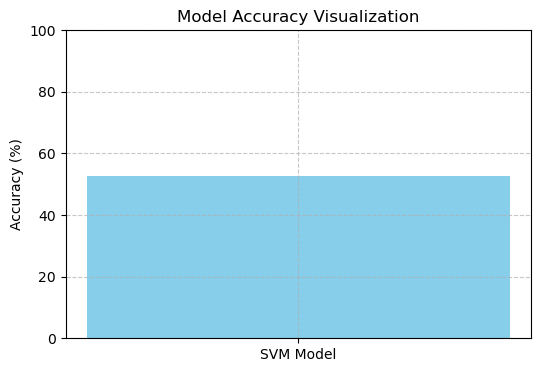

In [7]:
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_val, y_pred) * 100

plt.figure(figsize=(6, 4))
plt.bar(['SVM Model'], [accuracy], color='skyblue')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Visualization')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


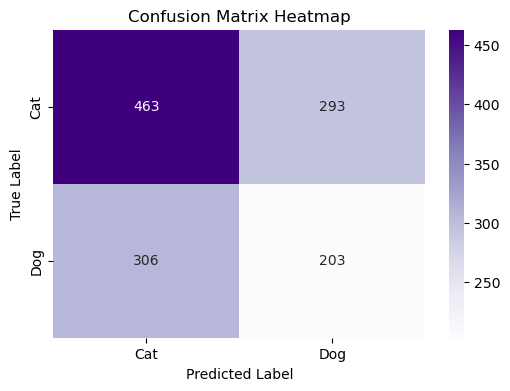

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Purples', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


C:\Users\ansh nimbalkar\AppData\Local\Temp\ipykernel_35520\50960689.py:20: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from current font.
  plt.tight_layout()
C:\Users\ansh nimbalkar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


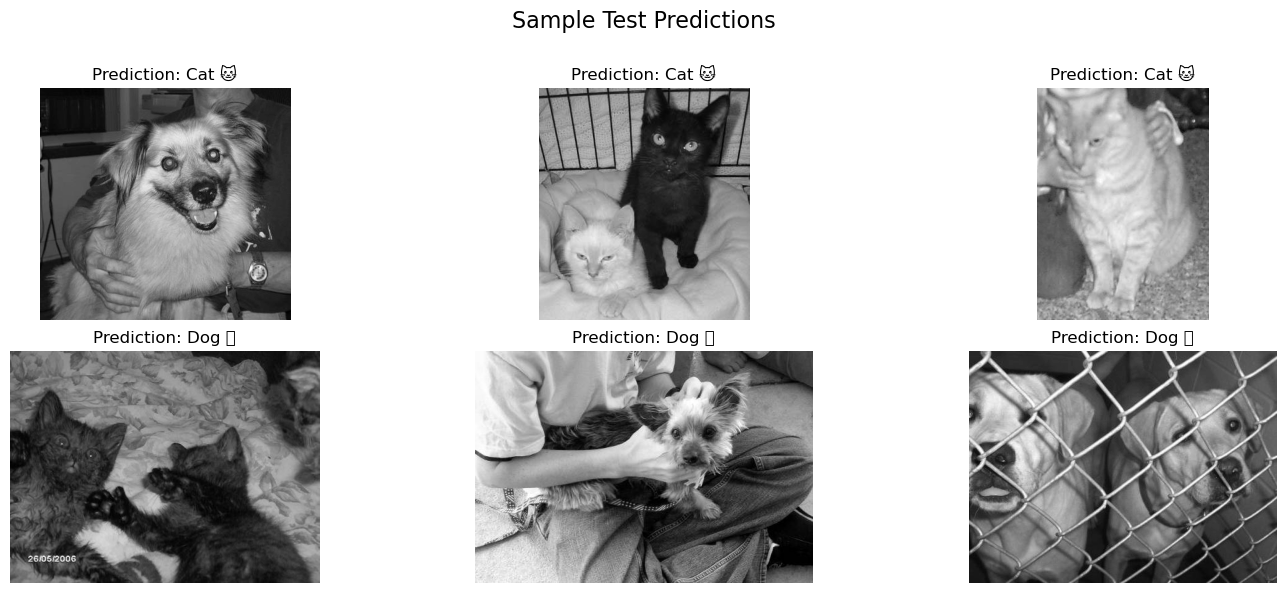

In [9]:
import random

def show_predictions(folder, model, n=6):
    images = random.sample(os.listdir(folder), n)
    plt.figure(figsize=(15, 6))
    
    for i, filename in enumerate(images):
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        flat_img = img_resized.flatten().reshape(1, -1) / 255.0
        prediction = model.predict(flat_img)[0]
        label = "Dog 🐶" if prediction == 1 else "Cat 🐱"

        plt.subplot(2, n//2, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction: {label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle("Sample Test Predictions", fontsize=16)
    plt.subplots_adjust(top=0.85)
    plt.show()

show_predictions(test_dir, model, n=6)


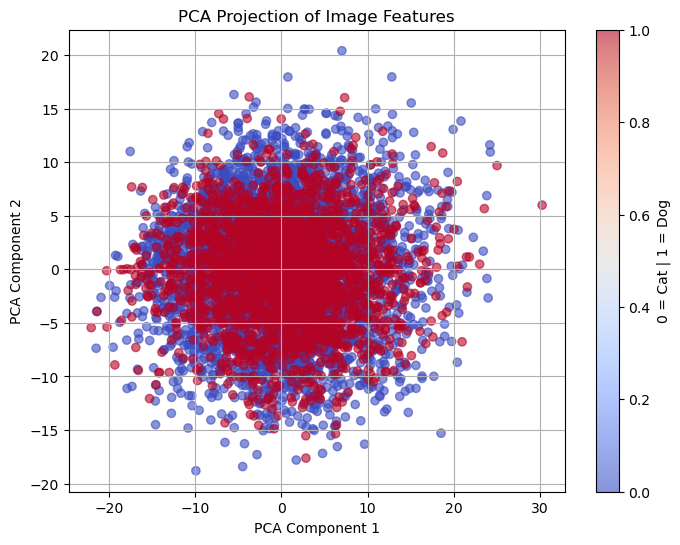

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("PCA Projection of Image Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(label='0 = Cat | 1 = Dog')
plt.show()